In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Recipe1M+ Dataset

## Recipes with Nutrition

In [8]:
# Read in json file
df = pd.read_json('../../datasets/recipes_with_nutritional_info.json')
df.head()

,fsa_lights_per100g,id,ingredients,instructions,nutr_per_ingredient,nutr_values_per100g,partition,quantity,title,unit,url,weight_per_ingr
0,"{'fat': 'green', 'salt': 'green', 'saturates':...",000095fc1d,"[{'text': 'yogurt, greek, plain, nonfat'}, {'t...",[{'text': 'Layer all ingredients in a serving ...,"[{'fat': 0.8845044000000001, 'nrg': 133.80964,...","{'energy': 81.12946131894766, 'fat': 2.1401392...",train,"[{'text': '8'}, {'text': '1'}, {'text': '1/4'}]",Yogurt Parfaits,"[{'text': 'ounce'}, {'text': 'cup'}, {'text': ...",http://tastykitchen.com/recipes/breakfastbrunc...,"[226.796, 152.0, 30.5]"
1,"{'fat': 'red', 'salt': 'orange', 'saturates': ...",00051d5b9d,"[{'text': 'sugars, granulated'}, {'text': 'oil...",[{'text': 'Cream sugar and butter together til...,"[{'fat': 0.0, 'nrg': 384.0, 'pro': 0.0, 'sat':...","{'energy': 477.09640393594606, 'fat': 23.41248...",val,"[{'text': '1/2'}, {'text': '3/4'}, {'text': '1...","Salt Free, Low Cholesterol Sugar Cookies Recipe","[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",http://cookeatshare.com/recipes/salt-free-low-...,"[100.80000000000001, 168.0, 21.25, 5.166666666..."
2,"{'fat': 'orange', 'salt': 'orange', 'saturates...",00059b093b,"[{'text': 'chicken, broilers or fryers, wing, ...","[{'text': 'Preheat oven to 400 degrees F.'}, {...","[{'fat': 174.859716, 'nrg': 2599.0821599999995...","{'energy': 208.05898280960727, 'fat': 14.29704...",train,"[{'text': '3'}, {'text': '1'}, {'text': '1/2'}...",Honey Sriracha Chicken Wings,"[{'text': 'pound'}, {'text': 'teaspoon'}, {'te...",http://tastykitchen.com/recipes/main-courses/h...,"[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999..."
3,"{'fat': 'orange', 'salt': 'orange', 'saturates...",0005fc89f7,"[{'text': 'crustaceans, shrimp, raw (not previ...","[{'text': 'In a large bowl, toss the shrimp, g...","[{'fat': 4.6266384, 'nrg': 771.1064, 'pro': 18...","{'energy': 194.7525956849092, 'fat': 15.980767...",train,"[{'text': '2'}, {'text': '3/4'}, {'text': '1 1...",Shrimp and Caper Salad,"[{'text': 'pound'}, {'text': 'cup'}, {'text': ...",http://allrecipes.com/recipe/shrimp-and-caper-...,"[907.184, 75.0, 151.5, 25.799999999999997, 134..."
4,"{'fat': 'orange', 'salt': 'green', 'saturates'...",0006ca31f4,"[{'text': 'cocoa, dry powder, unsweetened'}, {...",[{'text': 'Measure out the cocoa powder into a...,"[{'fat': 141.35999999999999, 'nrg': 2352.0, 'p...","{'energy': 303.43539955190437, 'fat': 5.094846...",train,"[{'text': '12'}, {'text': '12'}, {'text': '1'}]",Natural Peanut Butter Chocolate Bon Bons,"[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",http://www.food.com/recipe/natural-peanut-butt...,"[1032.0, 4068.0, 256.0]"


In [13]:
# How many rows are there?
print("Dataset contains {} individual recipes (without de-duping)".format(len(df)))

Dataset contains 51235 individual recipes (without de-duping)


In [14]:
# What columns are there?
list(df.columns)

['fsa_lights_per100g',
 'id',
 'ingredients',
 'instructions',
 'nutr_per_ingredient',
 'nutr_values_per100g',
 'partition',
 'quantity',
 'title',
 'unit',
 'url',
 'weight_per_ingr']

In [17]:
# Let's look at an individual row
recipe = df.iloc[0]
recipe

fsa_lights_per100g     {'fat': 'green', 'salt': 'green', 'saturates':...
id                                                            000095fc1d
ingredients            [{'text': 'yogurt, greek, plain, nonfat'}, {'t...
instructions           [{'text': 'Layer all ingredients in a serving ...
nutr_per_ingredient    [{'fat': 0.8845044000000001, 'nrg': 133.80964,...
nutr_values_per100g    {'energy': 81.12946131894766, 'fat': 2.1401392...
partition                                                          train
quantity                 [{'text': '8'}, {'text': '1'}, {'text': '1/4'}]
title                                                    Yogurt Parfaits
unit                   [{'text': 'ounce'}, {'text': 'cup'}, {'text': ...
url                    http://tastykitchen.com/recipes/breakfastbrunc...
weight_per_ingr                                   [226.796, 152.0, 30.5]
Name: 0, dtype: object

In [21]:
recipe["title"]

'Yogurt Parfaits'

In [22]:
# Each element is a single ingredient with multiple discriptors
recipe["ingredients"]

[{'text': 'yogurt, greek, plain, nonfat'},
 {'text': 'strawberries, raw'},
 {'text': 'cereals ready-to-eat, granola, homemade'}]

In [24]:
recipe["quantity"]

[{'text': '8'}, {'text': '1'}, {'text': '1/4'}]

In [25]:
recipe["unit"]

[{'text': 'ounce'}, {'text': 'cup'}, {'text': 'cup'}]

In [27]:
recipe["weight_per_ingr"]

[226.796, 152.0, 30.5]

In [29]:
recipe["nutr_per_ingredient"]

[{'fat': 0.8845044000000001,
  'nrg': 133.80964,
  'pro': 23.110512399999998,
  'sat': 0.26535132,
  'sod': 81.64656,
  'sug': 7.348190400000001},
 {'fat': 0.46,
  'nrg': 49.0,
  'pro': 1.02,
  'sat': 0.023,
  'sod': 2.0,
  'sug': 7.43},
 {'fat': 7.415,
  'nrg': 149.25,
  'pro': 4.17,
  'sat': 1.207,
  'sod': 8.0,
  'sug': 6.04}]

In [55]:
recipe["instructions"]

[{'text': 'Mix sugar, cocoa and salt in large mug.'},
 {'text': 'Heat milk in microwave at HIGH(100%) for 1 to 1-1/2 minutes or until hot.'},
 {'text': 'Gradually add hot milk to cocoa mixture in mug, stirring until well blended.'},
 {'text': 'Stir in vanilla.'},
 {'text': 'VARIATIONS:.'},
 {'text': 'Rich and Adult: Increase cocoa to 2 tablespoons; follow recipe.'},
 {'text': 'Lower Fat: Use nonfat milk; follow recipe.'},
 {'text': 'Sugar Free: Omit sugar.'},
 {'text': 'Combine cocoa and salt.'},
 {'text': 'Proceed as above, using nonfat milk.'},
 {'text': 'Stir in vanilla and sugar substitute with sweetening of 2 tablespoons sugar.'}]

In [83]:
# figure out if a string can be evaluated as a number
def is_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return 0

def ingredients_summary(recipe):
    """Summarize the ingredients in a recipe"""
    ingredients = [" ".join((a['text'].split(", "))[::-1]) for a in recipe["ingredients"]]
    quantities = [a['text'] for a in recipe["quantity"]]
    units = [a['text'] for a in recipe["unit"]]
    units = [a if is_number(b) <= 1 else a + "s" for a, b in zip(units, quantities)]
    weights = recipe["weight_per_ingr"]
    nutrients = recipe["nutr_per_ingredient"]

    total_nutrition = {}

    summary = f"Recipe: {recipe['title']}\n"
    
    # Create a summary string
    summary += "\nIngredients:\n"
    for ingr, qty, unit, weight, nutr in zip(ingredients, quantities, units, weights, nutrients):
        summary += "\t-{} {} of {}\n".format(qty, unit, ingr)
        # summary += "\t-{} {} ({} g) of {}\n".format(qty, unit, weight, ingr)

        # Sum the nutritional info (Should be the same fields for every entry)
        for key, value in nutr.items():
            if key not in total_nutrition:
                total_nutrition[key] = 0
            total_nutrition[key] += value

    summary += "\nInstructions:\n"
    instructions = [step['text'] for step in recipe["instructions"]]
    for i, step in enumerate(instructions):
        summary += "\t{}. {}\n".format(i+1, step)
    
    summary += "\nTotal nutritional information for the recipe:\n"
    for key, value in total_nutrition.items():
        summary += "- {}: {:.2f}\n".format(key, value)
    
    return summary

In [85]:
recipe = df.iloc[10278]
print(ingredients_summary(recipe))

Recipe: Stir-Fried Broccoli With Oyster Sauce

Ingredients:
	-2 pounds of raw broccoli
	-6 cups of generic bottled water
	-1/2 cup of dry chicken broth or bouillon soup
	-3 tablespoons of ready-to-serve oyster sauce
	-1 1/2 tablespoon of cooked without salt unenriched regular long-grain white rice
	-1 1/2 teaspoon of cornstarch
	-1 1/2 teaspoon of granulated sugars
	-1 teaspoon of soy sauce made from soy (tamari)
	-1 teaspoon of salad or cooking sesame oil
	-1 1/2 tablespoon of salad or cooking olive oil
	-1/4 cup of raw spring or scallions (includes tops and bulb) onions
	-1 1/2 tablespoon of ground ginger spices
	-2 tablespoons of garlic powder spices

Instructions:
	1. Cut broccoli florets and stems into bite-size pieces to measure 10 cups.Bring water to a boil in a large Dutch oven; add broccoli.
	2. Cook broccoli 4 minutes or until crisp-tender; drain.Combine broth and next 6 ingredients (broth through sesame oil); stir well with a whisk.
	3. Heat the vegetable oil in a large nons

In [93]:
# Categorize all recipes by breakfast, lunch, dinner, snack
# This is a very naive approach, but it works for now
def categorize_recipe(title):
    title = title.lower()
    title_singular = title.rstrip('s')  # naive singularization
    title = title + " " + title_singular  # combine both forms for checking
    
    if any(word in title for word in ["breakfast", "pancake", "omelet", "smoothie", "cereal", "waffle", "toast", "muffin", "bacon", "sausage", "egg", "yogurt"]):
        return "breakfast"
    elif any(word in title for word in ["lunch", "sandwich", "salad", "wrap", "soup", "burger", "taco", "burrito", "pizza"]):
        return "lunch"
    elif any(word in title for word in ["dinner", "steak", "pasta", "curry", "stew", "roast", "chicken", "fish", "vegetarian", "vegan", "rice", "noodle", "carrot"]):
        return "dinner"
    elif any(word in title for word in ["snack", "cookie", "brownie", "cake", "pie", "bar", "muffin", "cupcake", "dessert", "pudding", "ice cream"]):
        return "snack"
    else:
        return "other"


In [94]:

# Loop through all recipes and categorize them
df['category'] = df['title'].apply(categorize_recipe)
df['category'].value_counts()


category
other        33523
snack         5784
dinner        5054
lunch         3483
breakfast     3391
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Recipes by Category')

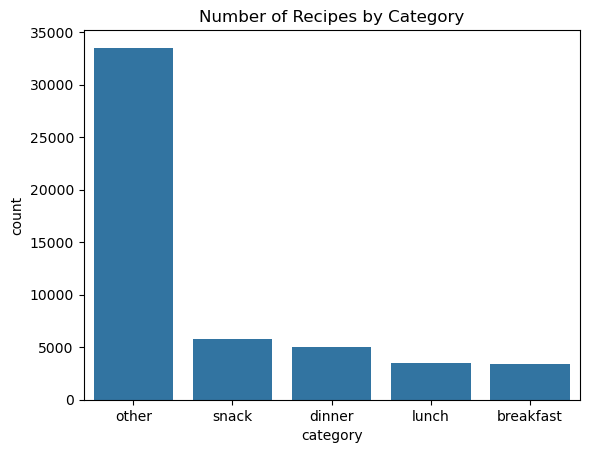

In [95]:
# Show a bar chart of the categoriesplt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Number of Recipes by Category')

In [96]:
# Find the top used words in recipe titles
from collections import Counter
import re
all_titles = " ".join(df['title'].tolist()).lower()
words = re.findall(r'\b\w+\b', all_titles)
word_counts = Counter(words)
common_words = word_counts.most_common(100)
common_words


[('and', 3714),
 ('recipe', 3337),
 ('bread', 3260),
 ('sauce', 3161),
 ('chocolate', 3100),
 ('s', 2898),
 ('with', 2673),
 ('butter', 2352),
 ('salad', 1864),
 ('cream', 1854),
 ('chicken', 1710),
 ('cheese', 1594),
 ('peanut', 1421),
 ('easy', 1413),
 ('cookies', 1398),
 ('dressing', 1378),
 ('honey', 1284),
 ('for', 1215),
 ('sweet', 1189),
 ('rice', 1182),
 ('apple', 1175),
 ('homemade', 1083),
 ('mix', 1079),
 ('dip', 1015),
 ('pie', 940),
 ('strawberry', 930),
 ('biscuits', 917),
 ('bars', 858),
 ('orange', 834),
 ('potatoes', 800),
 ('oatmeal', 793),
 ('hot', 768),
 ('cranberry', 756),
 ('potato', 751),
 ('roasted', 712),
 ('cake', 708),
 ('cinnamon', 686),
 ('granola', 679),
 ('blueberry', 678),
 ('mustard', 668),
 ('white', 668),
 ('free', 663),
 ('caramel', 663),
 ('wheat', 660),
 ('sugar', 638),
 ('fudge', 638),
 ('almond', 636),
 ('soup', 634),
 ('ice', 627),
 ('in', 623),
 ('creamy', 621),
 ('no', 618),
 ('a', 613),
 ('ginger', 605),
 ('pumpkin', 596),
 ('crust', 592),
 (

## Layer 1 Recipes

In [97]:
# Read in json file
df = pd.read_json('../../datasets/recipe1M_layers/layer1.json')
df.head()

,ingredients,url,partition,title,id,instructions
0,"[{'text': '6 ounces penne'}, {'text': '2 cups ...",http://www.epicurious.com/recipes/food/views/-...,train,Worlds Best Mac and Cheese,000018c8a5,[{'text': 'Preheat the oven to 350 F. Butter o...
1,"[{'text': '1 c. elbow macaroni'}, {'text': '1 ...",http://cookeatshare.com/recipes/dilly-macaroni...,train,Dilly Macaroni Salad Recipe,000033e39b,[{'text': 'Cook macaroni according to package ...
2,"[{'text': '8 tomatoes, quartered'}, {'text': '...",http://www.foodnetwork.com/recipes/gazpacho1.html,train,Gazpacho,000035f7ed,[{'text': 'Add the tomatoes to a food processo...
3,"[{'text': '2 12 cups milk'}, {'text': '1 12 cu...",http://www.food.com/recipe/crunchy-onion-potat...,test,Crunchy Onion Potato Bake,00003a70b1,[{'text': 'Preheat oven to 350 degrees Fahrenh...
4,[{'text': '1 (3 ounce) package watermelon gela...,http://www.food.com/recipe/cool-n-easy-creamy-...,train,Cool 'n Easy Creamy Watermelon Pie,00004320bb,"[{'text': 'Dissolve Jello in boiling water.'},..."


In [99]:
# How many rows are there?
print("Dataset contains {} individual recipes (without de-duping)".format(len(df)))

Dataset contains 1029720 individual recipes (without de-duping)


In [100]:
# What columns are there?
list(df.columns)

['ingredients', 'url', 'partition', 'title', 'id', 'instructions']

In [101]:
# Let's look at an individual row
recipe = df.iloc[0]
recipe

ingredients     [{'text': '6 ounces penne'}, {'text': '2 cups ...
url             http://www.epicurious.com/recipes/food/views/-...
partition                                                   train
title                                  Worlds Best Mac and Cheese
id                                                     000018c8a5
instructions    [{'text': 'Preheat the oven to 350 F. Butter o...
Name: 0, dtype: object

In [102]:
recipe["title"]

'Worlds Best Mac and Cheese'

In [103]:
# Each element is a single ingredient with multiple discriptors
recipe["ingredients"]

[{'text': '6 ounces penne'},
 {'text': '2 cups Beechers Flagship Cheese Sauce (recipe follows)'},
 {'text': '1 ounce Cheddar, grated (1/4 cup)'},
 {'text': '1 ounce Gruyere cheese, grated (1/4 cup)'},
 {'text': '1/4 to 1/2 teaspoon chipotle chili powder (see Note)'},
 {'text': '1/4 cup (1/2 stick) unsalted butter'},
 {'text': '1/3 cup all-purpose flour'},
 {'text': '3 cups milk'},
 {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
 {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
 {'text': '1/2 teaspoon kosher salt'},
 {'text': '1/4 to 1/2 teaspoon chipotle chili powder'},
 {'text': '1/8 teaspoon garlic powder'},
 {'text': '(makes about 4 cups)'}]

In [104]:
recipe["instructions"]

[{'text': 'Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.'},
 {'text': 'Cook the penne 2 minutes less than package directions.'},
 {'text': '(It will finish cooking in the oven.)'},
 {'text': 'Rinse the pasta in cold water and set aside.'},
 {'text': 'Combine the cooked pasta and the sauce in a medium bowl and mix carefully but thoroughly.'},
 {'text': 'Scrape the pasta into the prepared baking dish.'},
 {'text': 'Sprinkle the top with the cheeses and then the chili powder.'},
 {'text': 'Bake, uncovered, for 20 minutes.'},
 {'text': 'Let the mac and cheese sit for 5 minutes before serving.'},
 {'text': 'Melt the butter in a heavy-bottomed saucepan over medium heat and whisk in the flour.'},
 {'text': 'Continue whisking and cooking for 2 minutes.'},
 {'text': 'Slowly add the milk, whisking constantly.'},
 {'text': 'Cook until the sauce thickens, about 10 minutes, stirring frequently.'},
 {'text': 'Remove from the heat.'},
 {'text': 'Add the cheeses, salt, chili powder, 

In [ ]:
def ingredients_summary(recipe):
    """Summarize the ingredients in a recipe"""
    ingredients = [" ".join((a['text'].split(", "))[::-1]) for a in recipe["ingredients"]]


    summary = f"Recipe: {recipe['title']}\n"
    
    # Create a summary string
    summary += "\nIngredients:\n"
    for ingr in ingredients:
        summary += "\t-{}\n".format(ingr)

    summary += "\nInstructions:\n"
    instructions = [step['text'] for step in recipe["instructions"]]
    for i, step in enumerate(instructions):
        summary += "\t{}. {}\n".format(i+1, step)
    
    return summary

In [106]:
recipe = df.iloc[10278]
print(ingredients_summary(recipe))

Recipe: Sausage-Stuffed Zucchini

Ingredients:
	-halved lengthwise 4 md. zucchini
	-1/2 lb. bulk mild Italian sausage
	-1/4 cup chopped onion
	-minced 1 clove garlic
	-1 tsp. dried oregano
	-1/2 cup fresh corn kernels
	-frozen corn
	-seeded and diced 1 md. tomato
	-divided 1 cup shredded cheddar cheese

Instructions:
	1. Place zucchinis, cut side down, in a large skillet; add 1/2-inch of water.
	2. Bring to a boil; reduce heat and simmer until zucchini are crisp tender, about 5 minutes.
	3. Remove zucchini and drain water.
	4. In the same skillet, cook sausage, onion and garlic until sausage is browned; drain fat.
	5. Add oregano, corn and tomato.
	6. Cook and stir until heated through.
	7. Remove from heat and stir in 2/3 cup cheese; set aside.
	8. Scoop out and discard seeds from zucchini.
	9. Divide the sausage mixture among zucchini shells.
	10. Place in a greased 13x9x2-inch baking pan.
	11. Sprinkle with remaining cheese.
	12. Bake uncovered, at 375F for 12-15 minutes or until he